In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
# Load the 2D floor plan image
image_path = 'data\input_image_2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [8]:
# Threshold the image to get the floor plan layout
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

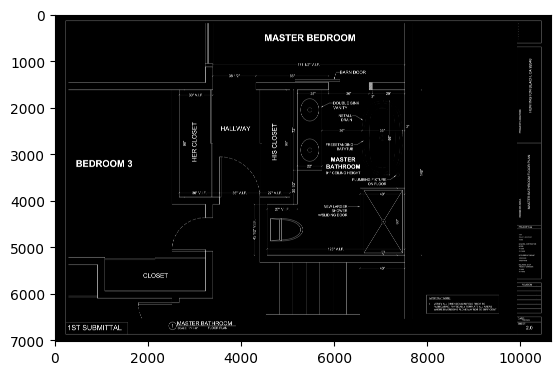

In [9]:
plt.imshow(thresholded, cmap='gray')
plt.show()

In [10]:
# Assuming the largest contour is the floor plan
floor_plan_contour = max(contours, key=cv2.contourArea)

# Convert the contour to a format suitable for plotting
floor_plan = floor_plan_contour.squeeze()

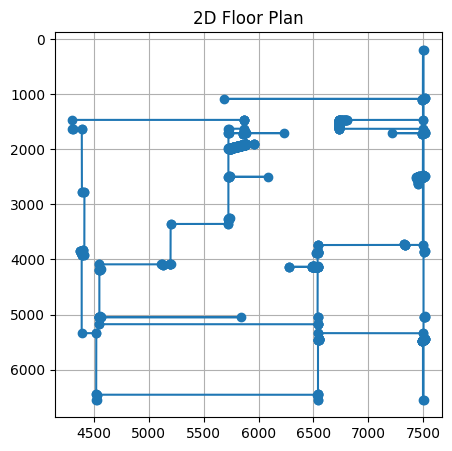

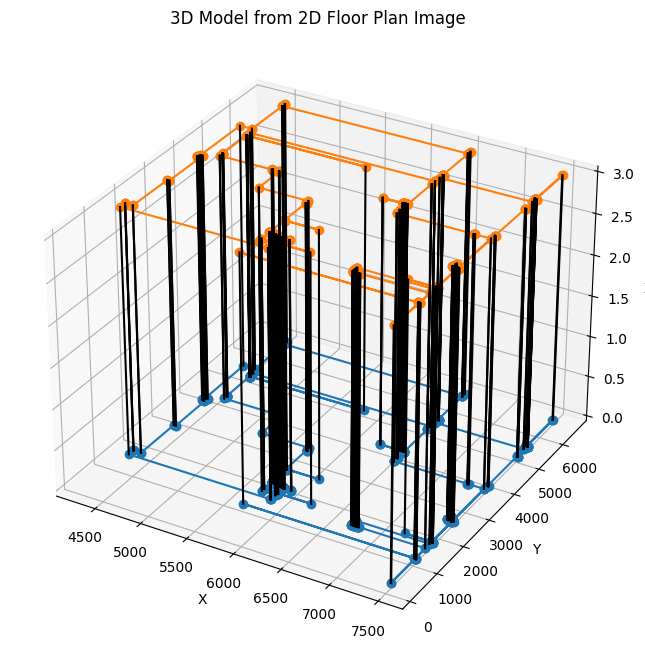

In [11]:
# Plot the 2D floor plan
plt.figure(figsize=(5,5))
plt.plot(floor_plan[:,0], floor_plan[:,1], '-o')
plt.title('2D Floor Plan')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Convert the 2D floor plan to a 3D model by extruding
wall_height = 3

# Create 3D vertices by adding height to the 2D floor plan
floor_plan_3d_bottom = np.hstack([floor_plan, np.zeros((floor_plan.shape[0], 1))])
floor_plan_3d_top = np.hstack([floor_plan, wall_height * np.ones((floor_plan.shape[0], 1))])

# Plot the 3D model
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(floor_plan_3d_bottom[:,0], floor_plan_3d_bottom[:,1], floor_plan_3d_bottom[:,2], '-o')
ax.plot(floor_plan_3d_top[:,0], floor_plan_3d_top[:,1], floor_plan_3d_top[:,2], '-o')
for i in range(floor_plan.shape[0]):
    ax.plot([floor_plan_3d_bottom[i,0], floor_plan_3d_top[i,0]],
            [floor_plan_3d_bottom[i,1], floor_plan_3d_top[i,1]],
            [floor_plan_3d_bottom[i,2], floor_plan_3d_top[i,2]], 'k-')
ax.set_title('3D Model from 2D Floor Plan Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()